In [ ]:
import math
from pathlib import Path
from typing import Tuple, List, Optional, Dict

import numpy as np
import pandas as pd
from PIL import Image

import torch
from torch.utils.data import Dataset
import torchvision.transforms.functional as TF
import torch.nn as nn

from torch.utils.data import DataLoader

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from __future__ import annotations
from dataclasses import dataclass

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import amp



In [ ]:
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

DATA_DIR = "/content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1/splits_compact"

print("Exists:", os.path.exists(DATA_DIR))
print("Files:", os.listdir(DATA_DIR)[:10])


Exists: True
Files: ['test_align.csv', 'val_thin.csv', 'train_thin.csv', 'train_align.csv', 'val_align.csv', 'test_thin.csv']


In [ ]:
csv_path1 = os.path.join(DATA_DIR, "train_align.csv")
train_align = pd.read_csv(csv_path1)

train_align.head()


,image_id,path,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,079519.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\079519.jpg,77.600000,113.976690,158.400000,112.186480,112.800000,141.426573,89.600000,176.037296,151.200000,174.247086
1,050337.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\050337.jpg,100.765957,100.765957,148.425532,87.148936,132.085106,123.914894,119.829787,151.148936,153.872340,141.617021
2,069895.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\069895.jpg,110.769231,100.875657,164.923077,101.323993,138.830769,129.120841,110.769231,153.779335,157.046154,156.021016
3,010102.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\010102.jpg,113.074205,100.313480,167.349823,97.103448,152.876325,130.808777,125.738516,154.081505,167.349823,151.673981
4,030098.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\030098.jpg,104.621005,100.392157,159.561644,102.065359,133.260274,137.202614,107.543379,155.050109,156.054795,153.934641


In [ ]:
csv_path2 = os.path.join(DATA_DIR, "val_align.csv")
val_align = pd.read_csv(csv_path2)

val_align.head()


,image_id,path,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,131055.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\131055.jpg,100.894118,100.894118,152.094118,102.400000,118.964706,141.552941,106.917647,155.105882,153.600000,153.600000
1,074231.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\074231.jpg,100.111732,100.111732,150.167598,104.402235,130.145251,133.005587,91.530726,154.458101,130.145251,154.458101
2,198136.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\198136.jpg,100.611354,101.286957,152.034934,101.286957,119.615721,135.791304,109.554585,154.713043,145.327511,155.826087
3,024250.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\024250.jpg,130.031746,100.266667,178.793651,108.800000,178.793651,130.133333,119.195767,152.533333,167.957672,163.200000
4,168148.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\168148.jpg,101.721854,101.721854,139.019868,122.066225,113.589404,147.496689,77.986755,155.973510,111.894040,169.536424


In [ ]:
csv_path3 = os.path.join(DATA_DIR, "test_align.csv")
test_align = pd.read_csv(csv_path3)

test_align.head()


,image_id,path,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,138153.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\138153.jpg,105.871186,100.748387,165.749153,109.832258,133.640678,142.038710,97.193220,155.251613,159.674576,163.509677
1,005839.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\005839.jpg,96.172973,97.668246,157.059459,99.488152,127.308108,124.966825,98.248649,153.478673,154.291892,155.298578
2,191589.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\191589.jpg,102.852097,100.965517,152.017660,94.344828,135.629139,131.862069,108.503311,155.586207,155.973510,146.758621
3,153016.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\153016.jpg,101.355102,101.355102,158.824490,97.175510,118.073469,127.477551,103.444898,155.689796,173.453061,149.420408
4,063999.jpg,D:\МФТИ\DL\arcface_mainset_cropped_1\063999.jpg,100.352000,100.755020,160.768000,105.895582,135.168000,129.542169,96.256000,154.216867,156.672000,160.385542


In [ ]:
TRAIN_DIR = "/content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1/cropped/train"
VAL_DIR   = "/content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1/cropped/val"
TEST_DIR  = "/content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1/cropped/test"


In [ ]:

def fix_paths(df, base_dir):
    df = df.copy()
    df["path"] = df["image_id"].apply(
        lambda x: os.path.join(base_dir, x)
    )
    return df


In [ ]:
train_align = fix_paths(train_align, TRAIN_DIR)
val_align   = fix_paths(val_align, VAL_DIR)
test_align  = fix_paths(test_align, TEST_DIR)


In [ ]:
train_align.head()


,image_id,path,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,079519.jpg,/content/drive/MyDrive/Colab Notebooks/MFTI/ar...,77.600000,113.976690,158.400000,112.186480,112.800000,141.426573,89.600000,176.037296,151.200000,174.247086
1,050337.jpg,/content/drive/MyDrive/Colab Notebooks/MFTI/ar...,100.765957,100.765957,148.425532,87.148936,132.085106,123.914894,119.829787,151.148936,153.872340,141.617021
2,069895.jpg,/content/drive/MyDrive/Colab Notebooks/MFTI/ar...,110.769231,100.875657,164.923077,101.323993,138.830769,129.120841,110.769231,153.779335,157.046154,156.021016
3,010102.jpg,/content/drive/MyDrive/Colab Notebooks/MFTI/ar...,113.074205,100.313480,167.349823,97.103448,152.876325,130.808777,125.738516,154.081505,167.349823,151.673981
4,030098.jpg,/content/drive/MyDrive/Colab Notebooks/MFTI/ar...,104.621005,100.392157,159.561644,102.065359,133.260274,137.202614,107.543379,155.050109,156.054795,153.934641


## Построение heatmaps

In [ ]:
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = True  # speed
    torch.backends.cudnn.deterministic = False

seed_everything(42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cuda')

In [ ]:
def gaussian_2d(xx: torch.Tensor, yy: torch.Tensor, cx: float, cy: float, sigma: float) -> torch.Tensor:
    # xx,yy: (H,W) float32
    # cx,cy: float coords in the same pixel space
    g = torch.exp(-((xx - cx) ** 2 + (yy - cy) ** 2) / (2.0 * sigma ** 2))
    return g  # values already in (0,1]


In [ ]:
class FaceLandmarksHeatmapDataset(Dataset):
    POINTS = ["lefteye", "righteye", "nose", "leftmouth", "rightmouth"]

    def __init__(
        self,
        df: pd.DataFrame,
        out_size: Tuple[int, int] = (128, 128),  # (H, W)
        sigma: float = 2.5,
        image_mode: str = "RGB",
        return_coords: bool = False,
        grid_on_cpu: bool = True,  # keep grid on CPU (recommended)
    ):
        self.df = df.reset_index(drop=True)
        self.out_h, self.out_w = int(out_size[0]), int(out_size[1])
        self.sigma = float(sigma)
        if self.sigma <= 0:
            raise ValueError("sigma must be > 0")

        self.image_mode = image_mode
        self.return_coords = return_coords

        # validate columns
        need = ["path"]
        for p in self.POINTS:
            need += [f"{p}_x", f"{p}_y"]
        missing = [c for c in need if c not in self.df.columns]
        if missing:
            raise ValueError(f"df is missing columns: {missing}")

        # precompute grid for this out_size
        device = torch.device("cpu") if grid_on_cpu else torch.device("cuda")
        y = torch.arange(self.out_h, dtype=torch.float32, device=device)
        x = torch.arange(self.out_w, dtype=torch.float32, device=device)
        yy, xx = torch.meshgrid(y, x, indexing="ij")  # (H,W)
        self.yy = yy
        self.xx = xx

    def __len__(self) -> int:
        return len(self.df)

    def __getitem__(self, idx: int):
        row = self.df.iloc[idx]

        img_path = Path(row["path"])
        if not img_path.is_file():
            raise FileNotFoundError(f"Image not found: {img_path}")

        # 1) read cropped square image
        img = Image.open(img_path).convert(self.image_mode)
        w0, h0 = img.size
        if w0 != h0:
            # should not happen given your check, but keep a hard guardrail
            raise ValueError(f"Expected square cropped image, got {w0}x{h0}: {img_path}")

        # 2) resize to out_size (W,H in PIL)
        img_rs = img.resize((self.out_w, self.out_h), resample=Image.BILINEAR)

        # 3) scale landmarks from (w0,h0) -> (out_w,out_h)
        sx = self.out_w / float(w0)
        sy = self.out_h / float(h0)

        coords_new: List[Tuple[float, float]] = []
        for p in self.POINTS:
            x_old = float(row[f"{p}_x"])
            y_old = float(row[f"{p}_y"])

            x_new = x_old * sx
            y_new = y_old * sy

            # clamp to valid pixel range
            x_new = min(max(x_new, 0.0), self.out_w - 1.0)
            y_new = min(max(y_new, 0.0), self.out_h - 1.0)
            coords_new.append((x_new, y_new))

        # 4) build heatmaps (5,H,W)
        heatmaps = torch.zeros((len(self.POINTS), self.out_h, self.out_w), dtype=torch.float32)

        # keep grid on same device as heatmaps
        xx = self.xx.to(heatmaps.device)
        yy = self.yy.to(heatmaps.device)

        for i, (cx, cy) in enumerate(coords_new):
            heatmaps[i] = gaussian_2d(xx, yy, cx=cx, cy=cy, sigma=self.sigma)

        # 5) image tensor
        img_np = np.asarray(img_rs, dtype=np.float32) / 255.0  # (H,W,3)
        image_tensor = torch.from_numpy(img_np).permute(2, 0, 1).contiguous()  # (3,H,W)

        if self.return_coords:
            coords_tensor = torch.tensor(coords_new, dtype=torch.float32)  # (5,2)
            return image_tensor, heatmaps, coords_tensor

        return image_tensor, heatmaps



In [ ]:
# для проверки
ds_train = FaceLandmarksHeatmapDataset(train_align, out_size=(128,128), sigma=2.5)
x, hm = ds_train[0]
print(x.shape, hm.shape)  # (3,128,128) (5,128,128)

ds_train_256 = FaceLandmarksHeatmapDataset(train_align, out_size=(256,256), sigma=2.5)
x2, hm2 = ds_train_256[0]
print(x2.shape, hm2.shape)  # (3,256,256) (5,256,256)


torch.Size([3, 128, 128]) torch.Size([5, 128, 128])
torch.Size([3, 256, 256]) torch.Size([5, 256, 256])


In [ ]:
# Наложение heatmap на изображение
def show_overlay(ds, idx=0, channel=None):
    img_t, hm_t = ds[idx]
    img = img_t.permute(1, 2, 0).cpu().numpy()
    hmaps = hm_t.cpu().numpy()

    if channel is None:
        hm = hmaps.max(axis=0)   # объединённая карта (max по каналам)
        title = "Overlay (max over 5 heatmaps)"
    else:
        hm = hmaps[channel]
        title = f"Overlay ({POINTS[channel]})"

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.imshow(hm, alpha=0.5, cmap="jet")  # прозрачная накладка
    plt.title(title)
    plt.axis("off")
    plt.show()


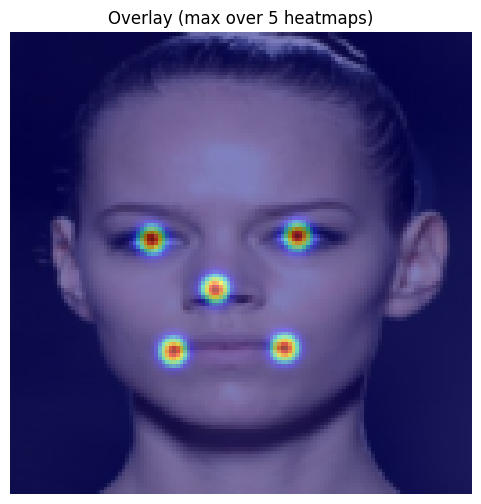

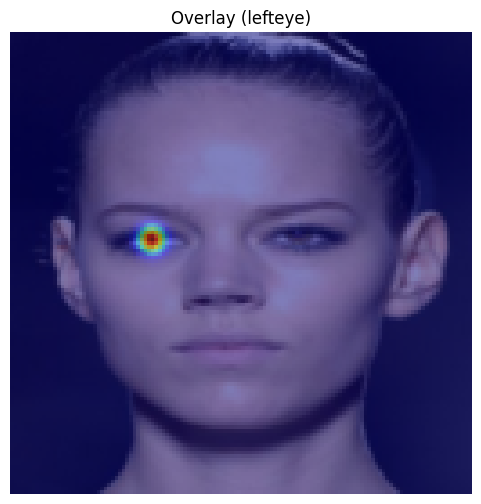

In [ ]:
POINTS = FaceLandmarksHeatmapDataset.POINTS  # чтобы имя точек было доступно в show_overlay

ds_train = FaceLandmarksHeatmapDataset(train_align, out_size=(128,128), sigma=2.5)

show_overlay(ds_train, idx=0)        # все точки сразу
show_overlay(ds_train, idx=0, channel=0)  # только lefteye


## Обучение на MSE(heatmaps)

In [ ]:
@dataclass
class TrainCfg:
    out_size: Tuple[int,int] = (128, 128)
    sigma: float = 2.5
    batch_size: int = 32
    num_workers: int = 2
    lr: float = 1e-3
    epochs: int = 10
    stacks: int = 2
    num_keypoints: int = 5

cfg = TrainCfg()

ds_train = FaceLandmarksHeatmapDataset(
    train_align,
    out_size=cfg.out_size,
    sigma=cfg.sigma,
)

ds_val = FaceLandmarksHeatmapDataset(
    val_align,
    out_size=cfg.out_size,
    sigma=cfg.sigma,
)

ds_test = FaceLandmarksHeatmapDataset(
    test_align,
    out_size=cfg.out_size,
    sigma=cfg.sigma,
)

dl_train = DataLoader(
    ds_train,
    batch_size=cfg.batch_size,
    shuffle=True,
    num_workers=cfg.num_workers,
    pin_memory=(device.type == "cuda"),
    drop_last=True,
)

dl_val = DataLoader(
    ds_val,
    batch_size=cfg.batch_size,
    shuffle=False,
    num_workers=cfg.num_workers,
    pin_memory=(device.type == "cuda"),
    drop_last=False,
)

dl_test = DataLoader(
    ds_test,
    batch_size=cfg.batch_size,
    shuffle=False,
    num_workers=cfg.num_workers,
    pin_memory=(device.type == "cuda"),
    drop_last=False,
)

xb, yb = next(iter(dl_train))
print(xb.shape, yb.shape)  # (B,3,H,W) (B,5,H,W)


torch.Size([32, 3, 128, 128]) torch.Size([32, 5, 128, 128])


In [ ]:
# Stacked Hourglass (скелет, но рабочий)
class Residual(nn.Module):
    def __init__(self, in_ch: int, out_ch: int):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch // 2, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_ch // 2)
        self.conv2 = nn.Conv2d(out_ch // 2, out_ch // 2, 3, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_ch // 2)
        self.conv3 = nn.Conv2d(out_ch // 2, out_ch, 1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_ch)

        self.skip = None
        if in_ch != out_ch:
            self.skip = nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 1, bias=False),
                nn.BatchNorm2d(out_ch),
            )

    def forward(self, x):
        identity = x
        out = F.relu(self.bn1(self.conv1(x)), inplace=True)
        out = F.relu(self.bn2(self.conv2(out)), inplace=True)
        out = self.bn3(self.conv3(out))
        if self.skip is not None:
            identity = self.skip(identity)
        out = F.relu(out + identity, inplace=True)
        return out


class Hourglass(nn.Module):
    def __init__(self, depth: int, channels: int):
        super().__init__()
        self.depth = depth

        self.up1 = Residual(channels, channels)

        self.pool = nn.MaxPool2d(2, 2)
        self.low1 = Residual(channels, channels)

        if depth > 1:
            self.low2 = Hourglass(depth - 1, channels)
        else:
            self.low2 = Residual(channels, channels)

        self.low3 = Residual(channels, channels)

    def forward(self, x):
        up1 = self.up1(x)

        low = self.pool(x)
        low = self.low1(low)
        low = self.low2(low)
        low = self.low3(low)

        up2 = F.interpolate(low, scale_factor=2, mode="nearest")
        return up1 + up2


class StackedHourglass(nn.Module):
    def __init__(self, num_stacks: int = 2, num_keypoints: int = 5, hg_depth: int = 4, channels: int = 256):
        super().__init__()
        self.num_stacks = num_stacks
        self.num_keypoints = num_keypoints
        self.channels = channels

        # simple stem
        self.stem = nn.Sequential(
            nn.Conv2d(3, 64, 7, stride=2, padding=3, bias=False),  # H/2
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            Residual(64, 128),
            nn.MaxPool2d(2, 2),  # H/4
            Residual(128, 128),
            Residual(128, channels),
        )

        self.hgs = nn.ModuleList([Hourglass(hg_depth, channels) for _ in range(num_stacks)])
        self.features = nn.ModuleList([nn.Sequential(Residual(channels, channels), nn.Conv2d(channels, channels, 1, bias=False),
                                                     nn.BatchNorm2d(channels), nn.ReLU(inplace=True))
                                       for _ in range(num_stacks)])
        self.heads = nn.ModuleList([nn.Conv2d(channels, num_keypoints, 1) for _ in range(num_stacks)])

        # inter-stack connections
        self.merge_features = nn.ModuleList([nn.Conv2d(channels, channels, 1, bias=False) for _ in range(num_stacks - 1)])
        self.merge_preds = nn.ModuleList([nn.Conv2d(num_keypoints, channels, 1, bias=False) for _ in range(num_stacks - 1)])

    def forward(self, x):
        x = self.stem(x)  # (B, C, H/4, W/4)

        preds = []
        for i in range(self.num_stacks):
            hg = self.hgs[i](x)
            feat = self.features[i](hg)
            pred = self.heads[i](feat)  # (B,K,H/4,W/4)
            preds.append(pred)

            if i < self.num_stacks - 1:
                x = x + self.merge_features[i](feat) + self.merge_preds[i](pred)

        return preds  # list of (B,K,H/4,W/4)


In [ ]:
def mse_heatmap_loss(preds_list, gt_heatmaps):
    total = 0.0
    for pred in preds_list:
        gt_small = F.interpolate(gt_heatmaps, size=pred.shape[-2:], mode="bilinear", align_corners=False)
        total = total + F.mse_loss(pred, gt_small)
    return total / len(preds_list)


@torch.no_grad()
def heatmaps_to_points_argmax(hm: torch.Tensor) -> torch.Tensor:
    B, K, H, W = hm.shape
    flat = hm.view(B, K, -1)
    idx = flat.argmax(dim=-1)  # (B,K)
    y = (idx // W).float()
    x = (idx % W).float()
    return torch.stack([x, y], dim=-1)  # (B,K,2)


In [ ]:
model = StackedHourglass(
    num_stacks=cfg.stacks,
    num_keypoints=cfg.num_keypoints,
    hg_depth=4,
    channels=256
).to(device)

opt = torch.optim.Adam(model.parameters(), lr=cfg.lr)
scheduler = torch.optim.lr_scheduler.StepLR(opt, step_size=10, gamma=0.5)

device_type = "cuda" if torch.cuda.is_available() else "cpu"
use_amp = (device_type == "cuda")

scaler = amp.GradScaler(device_type, enabled=use_amp)


def run_epoch(dl, training: bool):
    model.train(training)
    losses = []

    for xb, yb in dl:
        xb = xb.to(device, non_blocking=True)
        yb = yb.to(device, non_blocking=True)

        with amp.autocast(device_type, enabled=use_amp):
            preds_list = model(xb)              # list of (B, K, H, W)
            loss = mse_heatmap_loss(preds_list, yb)

        if training:
            opt.zero_grad(set_to_none=True)
            scaler.scale(loss).backward()
            scaler.step(opt)
            scaler.update()

        losses.append(loss.detach().item())

    return float(np.mean(losses)) if losses else float("nan")


best_val = float("inf")
train_losses = []
val_losses = []


for epoch in range(1, cfg.epochs + 1):
    tr_loss = run_epoch(dl_train, training=True)
    va_loss = run_epoch(dl_val, training=False)

    train_losses.append(tr_loss)
    val_losses.append(va_loss)

    scheduler.step()

    print(
        f"Epoch {epoch:02d}/{cfg.epochs} | "
        f"train={tr_loss:.6f} | val={va_loss:.6f}"
    )

    if va_loss < best_val:
        best_val = va_loss
        torch.save(
            {
                "model_state": model.state_dict(),
                "cfg": cfg.__dict__,
            },
            "stacked_hourglass_best.pt",
        )
        print("  saved: stacked_hourglass_best.pt")

Epoch 01/10 | train=0.004464 | val=0.000997
  saved: stacked_hourglass_best.pt
Epoch 02/10 | train=0.000756 | val=0.000537
  saved: stacked_hourglass_best.pt
Epoch 03/10 | train=0.000382 | val=0.000312
  saved: stacked_hourglass_best.pt
Epoch 04/10 | train=0.000239 | val=0.000224
  saved: stacked_hourglass_best.pt
Epoch 05/10 | train=0.000183 | val=0.000185
  saved: stacked_hourglass_best.pt
Epoch 06/10 | train=0.000151 | val=0.000152
  saved: stacked_hourglass_best.pt
Epoch 07/10 | train=0.000131 | val=0.000145
  saved: stacked_hourglass_best.pt
Epoch 08/10 | train=0.000116 | val=0.000142
  saved: stacked_hourglass_best.pt
Epoch 09/10 | train=0.000105 | val=0.000128
  saved: stacked_hourglass_best.pt
Epoch 10/10 | train=0.000096 | val=0.000124
  saved: stacked_hourglass_best.pt


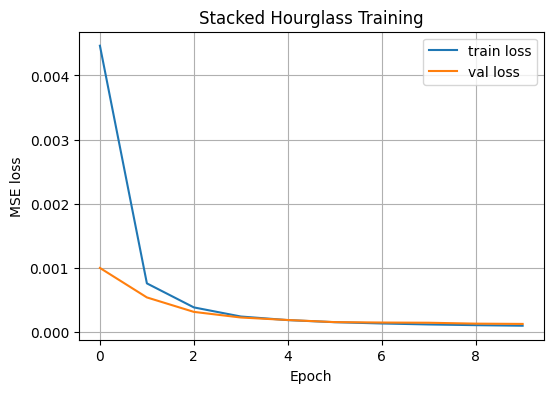

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(train_losses, label="train loss")
plt.plot(val_losses, label="val loss")
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Stacked Hourglass Training")
plt.legend()
plt.grid(True)
plt.show()


В процессе обучения наблюдается стабильное снижение функции потерь MSE на обучающей и валидационной выборках. Отсутствие расхождения между train и val кривыми свидетельствует об отсутствии переобучения и корректной обобщающей способности модели. После 5–6 эпох обучение выходит на плато, что указывает на достижение предела точности при выбранной архитектуре и гиперпараметрах.

In [ ]:
@torch.no_grad()
def visualize_batch(dl, n=4, show_sum=True, show_per_kp=False, kp_max=5):

    model.eval()

    xb, yb = next(iter(dl))
    xb = xb[:n].to(device)
    yb = yb[:n].to(device)  # (B,K,H,W)

    preds_list = model(xb)
    pred = preds_list[-1]  # last stack: (B,K,h,w)

    # upscale pred to GT size for visualization
    pred_up = F.interpolate(pred, size=yb.shape[-2:], mode="bilinear", align_corners=False)

    # points for overlay
    pts_gt = heatmaps_to_points_argmax(yb)       # (B,K,2) in (H,W)
    pts_pr = heatmaps_to_points_argmax(pred_up)  # (B,K,2)

    xb_np = xb.detach().cpu().permute(0, 2, 3, 1).numpy()  # (B,H,W,3)

    B, K, H, W = yb.shape
    k_show = min(K, kp_max)

    for i in range(n):
        img = xb_np[i]

        # --- Figure layout ---
        # 1) Overlay points
        # 2) Sum heatmaps (optional)
        # 3) Per-kp heatmaps (optional)
        rows = 1
        if show_sum:
            rows += 1
        if show_per_kp:
            rows += 2  # GT kp row + Pred kp row

        # columns: overlay + (sum GT, sum Pred) OR per-kp columns
        # We'll build each row with dynamic number of columns:
        # - overlay row: 1 col
        # - sum row: 2 cols (GT sum, Pred sum)
        # - per-kp rows: k_show cols each (GT kp, Pred kp)
        # Use separate figures per row-group for simplicity and readability.

        # --- 1) Overlay ---
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        for k in range(cfg.num_keypoints):
            xg, yg = pts_gt[i, k].cpu().numpy()
            xp, yp = pts_pr[i, k].cpu().numpy()
            plt.scatter([xg], [yg], s=30, marker="o", c="lime")  # GT
            plt.scatter([xp], [yp], s=30, marker="x", c="red")   # Pred
        plt.title("GT (o) vs Pred (x)")
        plt.axis("off")
        plt.show()

        # --- 2) Sum heatmaps ---
        if show_sum:
            gt_sum = yb[i].sum(dim=0).detach().cpu()          # (H,W)
            pr_sum = pred_up[i].sum(dim=0).detach().cpu()     # (H,W)

            plt.figure(figsize=(8, 4))
            ax1 = plt.subplot(1, 2, 1)
            ax1.imshow(gt_sum, cmap="magma")
            ax1.set_title("GT heatmaps sum")
            ax1.axis("off")

            ax2 = plt.subplot(1, 2, 2)
            ax2.imshow(pr_sum, cmap="magma")
            ax2.set_title("Pred heatmaps sum")
            ax2.axis("off")
            plt.show()

        # --- 3) Per-keypoint heatmaps ---
        if show_per_kp:
            # GT per kp
            plt.figure(figsize=(3 * k_show, 3))
            for k in range(k_show):
                ax = plt.subplot(1, k_show, k + 1)
                ax.imshow(yb[i, k].detach().cpu(), cmap="magma")
                ax.set_title(f"GT kp{k}")
                ax.axis("off")
            plt.show()

            # Pred per kp
            plt.figure(figsize=(3 * k_show, 3))
            for k in range(k_show):
                ax = plt.subplot(1, k_show, k + 1)
                ax.imshow(pred_up[i, k].detach().cpu(), cmap="magma")
                ax.set_title(f"Pred kp{k}")
                ax.axis("off")
            plt.show()


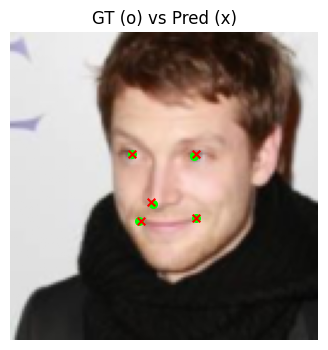

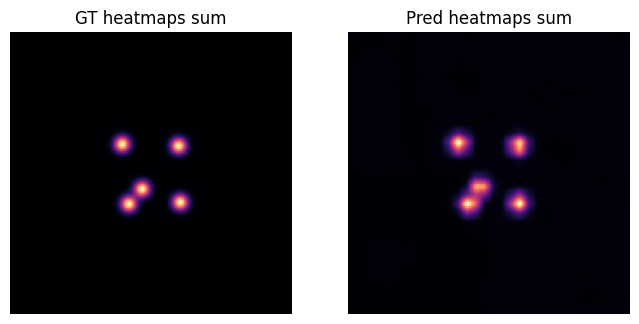

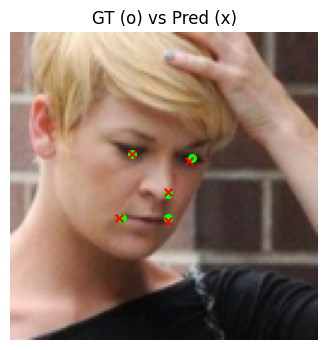

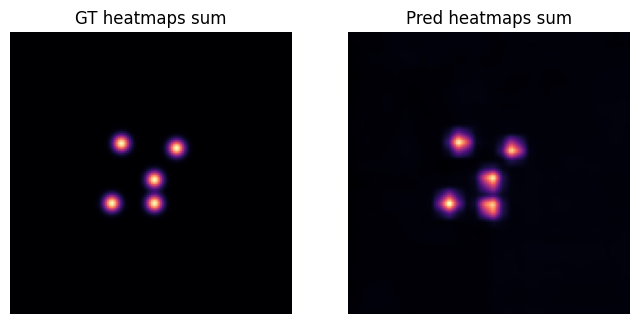

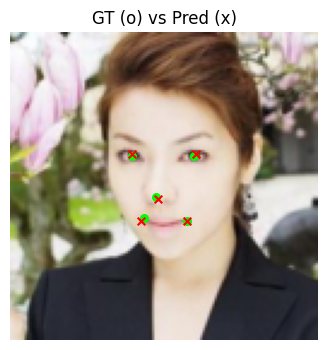

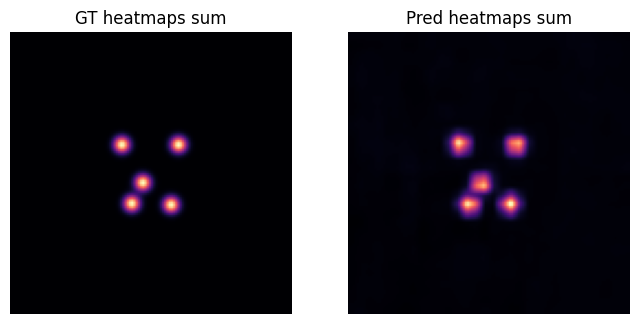

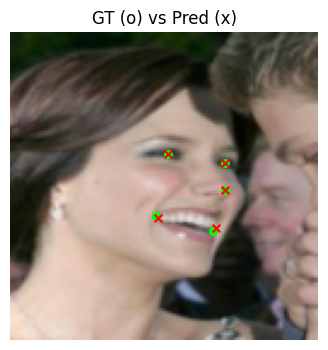

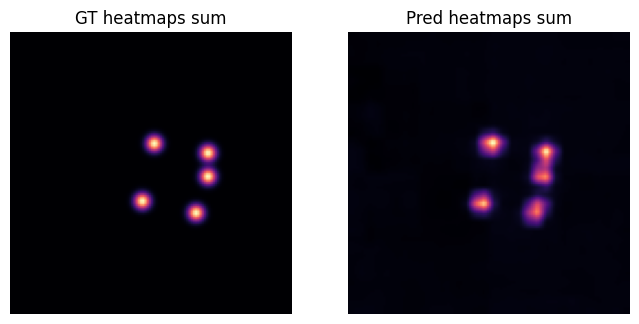

In [ ]:
# Только overlay + sum по каналам
visualize_batch(dl_val, n=4, show_sum=True, show_per_kp=False)


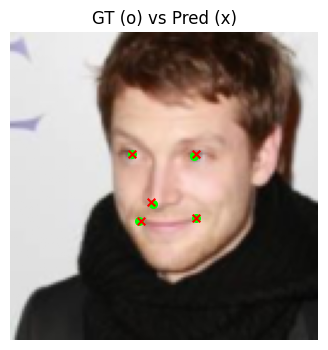

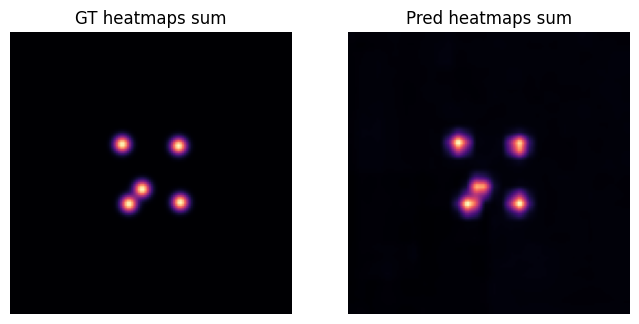

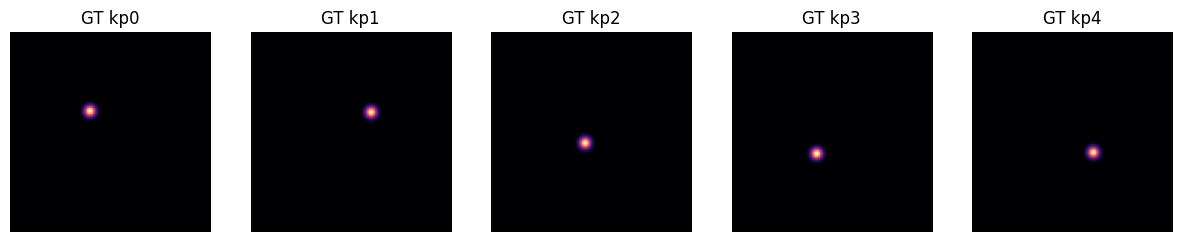

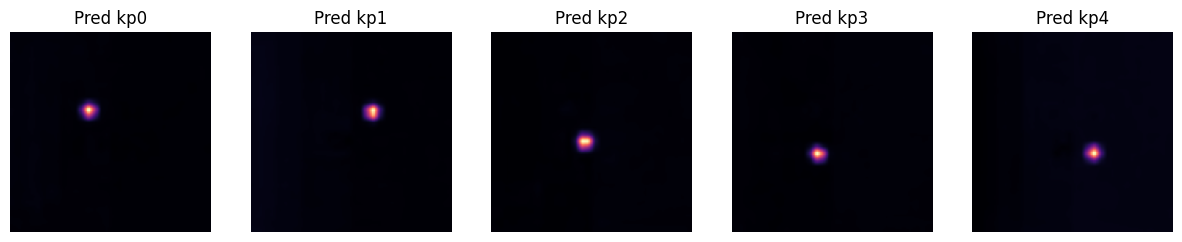

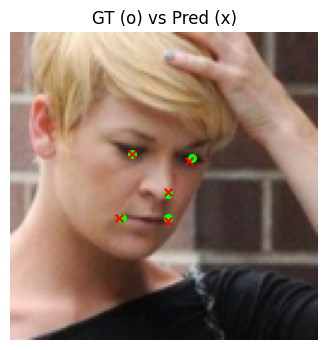

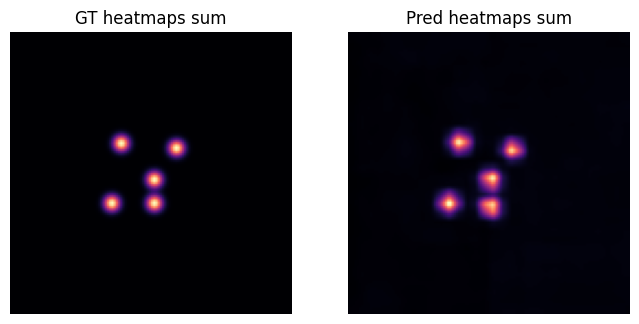

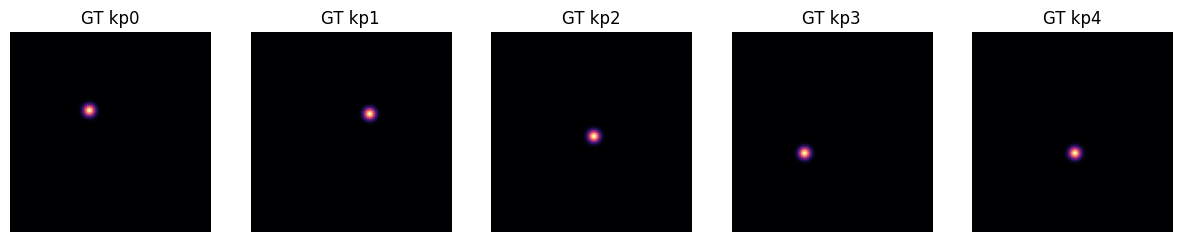

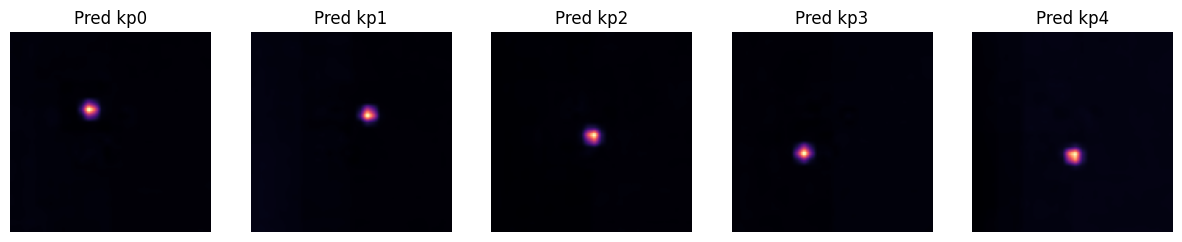

In [ ]:
# Overlay + sum + по каждому keypoint
visualize_batch(dl_val, n=2, show_sum=True, show_per_kp=True, kp_max=5)


In [ ]:
SAVE_PATH = (
    "/content/drive/MyDrive/Colab Notebooks/"
    "MFTI/arcface_mainset_1/"
    "stacked_hourglass_best.pt"
)

torch.save(
    {
        "model_state": model.state_dict(),
        "cfg": cfg.__dict__,
    },
    SAVE_PATH,
)


Проверим ОДИН batch из test_align визуально

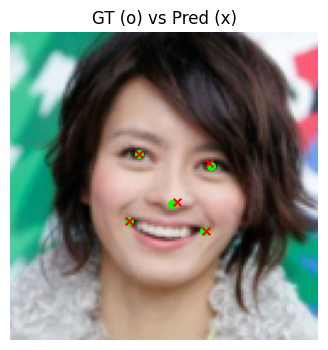

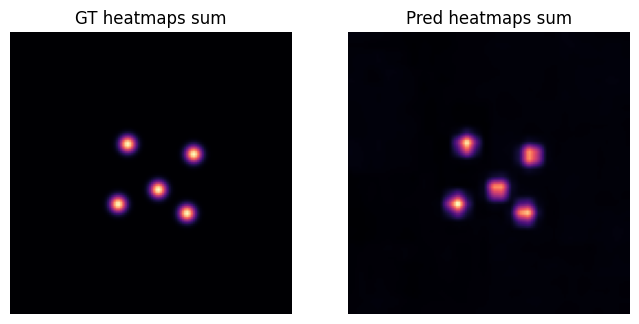

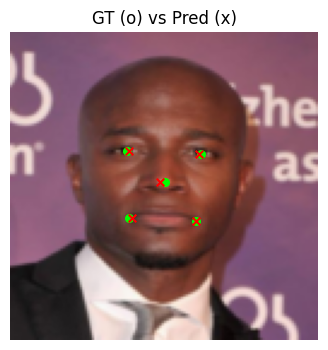

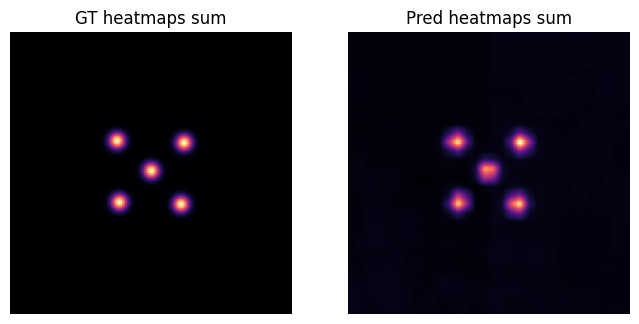

In [ ]:
visualize_batch(dl_test, n=2, show_sum=True, show_per_kp=False)


Тестовая выборка использовалась исключительно для финальной проверки корректности инференса и визуального качества предсказаний. Подбор гиперпараметров и обучение модели осуществлялись только на обучающей и валидационной выборках.

## Αlignment


In [ ]:
# Heatmaps → points Argmax (просто и быстро)
@torch.no_grad()
def heatmaps_to_points_argmax(hm: torch.Tensor) -> torch.Tensor:
    """
    hm: (B,K,H,W) -> (B,K,2) where [:,:,0]=x, [:,:,1]=y
    """
    B, K, H, W = hm.shape
    flat = hm.view(B, K, -1)
    idx = flat.argmax(dim=-1)  # (B,K)
    y = (idx // W).float()
    x = (idx % W).float()
    return torch.stack([x, y], dim=-1)



In [ ]:
# Heatmaps → points Soft-argmax (стабильнее)
@torch.no_grad()
def heatmaps_to_points_softargmax(hm: torch.Tensor, beta: float = 100.0) -> torch.Tensor:
    B, K, H, W = hm.shape
    hm_flat = hm.view(B, K, -1)  # (B,K,HW)
    prob = torch.softmax(hm_flat * beta, dim=-1)

    ys = torch.arange(H, device=hm.device, dtype=hm.dtype)
    xs = torch.arange(W, device=hm.device, dtype=hm.dtype)
    yy, xx = torch.meshgrid(ys, xs, indexing="ij")  # (H,W)
    coords = torch.stack([xx.reshape(-1), yy.reshape(-1)], dim=-1)  # (HW,2)

    pts = torch.matmul(prob, coords)  # (B,K,2)
    return pts


In [ ]:
# Similarity transform (Umeyama) → affine 2×3
# Матрица, чтобы из исходного лица получить aligned
def umeyama_similarity(src: np.ndarray, dst: np.ndarray, estimate_scale: bool = True) -> np.ndarray:
    src = src.astype(np.float64)
    dst = dst.astype(np.float64)
    assert src.shape == dst.shape and src.shape[1] == 2

    N = src.shape[0]
    src_mean = src.mean(axis=0)
    dst_mean = dst.mean(axis=0)

    src_d = src - src_mean
    dst_d = dst - dst_mean

    cov = (dst_d.T @ src_d) / N  # 2x2
    U, S, Vt = np.linalg.svd(cov)

    R = U @ Vt
    if np.linalg.det(R) < 0:  # reflection fix
        U[:, -1] *= -1
        S[-1] *= -1
        R = U @ Vt

    if estimate_scale:
        var_src = (src_d ** 2).sum() / N
        scale = S.sum() / var_src
    else:
        scale = 1.0

    t = dst_mean - scale * (R @ src_mean)

    M = np.zeros((2, 3), dtype=np.float32)
    M[:, :2] = (scale * R).astype(np.float32)
    M[:, 2] = t.astype(np.float32)
    return M




In [ ]:
# Эталонные 5 точек для канвы 112×112
ARC_FACE_112_TEMPLATE = np.array([
    [38.2946, 51.6963],  # left eye
    [73.5318, 51.5014],  # right eye
    [56.0252, 71.7366],  # nose
    [41.5493, 92.3655],  # left mouth
    [70.7299, 92.2041],  # right mouth
], dtype=np.float32)


Это эталонные координаты 5 ключевых точек
в канонической канве 112×112, куда мы приводим все лица.

То есть: «куда должны попасть глаза, нос и рот после выравнивания».

Эти точки пришли из InsightFace / ArcFace пайплайна, а ещё раньше — из классического face alignment:

- обучались на миллионах лиц

- усреднялись позиции landmarks после приведения лиц

- зафиксировались как де-факто стандарт

In [ ]:
# Warp image → aligned face
def align_face_by_5pts(img_bgr: np.ndarray, pts5_xy: np.ndarray, out_size: int = 112) -> tuple[np.ndarray, np.ndarray]:
    assert pts5_xy.shape == (5, 2)
    dst = ARC_FACE_112_TEMPLATE.copy()

    if out_size != 112:
        dst = dst * (out_size / 112.0)

    M = umeyama_similarity(pts5_xy.astype(np.float32), dst.astype(np.float32), estimate_scale=True)
    aligned = cv2.warpAffine(img_bgr, M, (out_size, out_size), flags=cv2.INTER_LINEAR, borderValue=0)
    return aligned, M


In [ ]:
# Финальная функция Препроцесс
def preprocess_pil_for_hourglass(img_pil: Image.Image, out_size_hw=(128, 128)) -> torch.Tensor:
    out_h, out_w = int(out_size_hw[0]), int(out_size_hw[1])

    img_pil = img_pil.convert("RGB")
    img_rs = img_pil.resize((out_w, out_h), resample=Image.BILINEAR)  # PIL expects (W,H)

    img_np = np.asarray(img_rs, dtype=np.float32) / 255.0  # (H,W,3)
    x = torch.from_numpy(img_np).permute(2, 0, 1).unsqueeze(0).contiguous()  # (1,3,H,W)
    return x


In [ ]:
# image → predicted landmarks → aligned_face
# модель выдаёт heatmaps размера H/4×W/4, поэтому мы апсемплим до (H,W) и уже там берём точки
@torch.no_grad()
def predict_landmarks_5pts_from_pil(
    img_pil: Image.Image,
    model: torch.nn.Module,
    device: torch.device,
    model_in_hw=(128, 128),
    use_softargmax=True,
    soft_beta=100.0,
) -> np.ndarray:
    model.eval()
    x = preprocess_pil_for_hourglass(img_pil, out_size_hw=model_in_hw).to(device)

    preds_list = model(x)       # list of (1,5,h,w) where h=H/4, w=W/4
    hm = preds_list[-1]         # (1,5,h,w)

    # upsample heatmaps to model input size (H,W)
    H, W = int(model_in_hw[0]), int(model_in_hw[1])
    hm_up = F.interpolate(hm, size=(H, W), mode="bilinear", align_corners=False)

    if use_softargmax:
        pts = heatmaps_to_points_softargmax(hm_up, beta=soft_beta)[0]  # (5,2)
    else:
        pts = heatmaps_to_points_argmax(hm_up)[0]

    return pts.detach().cpu().numpy().astype(np.float32)


@torch.no_grad()
def align_cropped_face_pipeline(
    img_path: str,
    model: torch.nn.Module,
    device: torch.device,
    model_in_hw=(128, 128),     # (H,W) как cfg.out_size
    out_aligned_size=112,
    use_softargmax=True,
    soft_beta=100.0,
):
    model.eval()

    # --- 0) load ORIGINAL cropped image (do NOT resize for warping) ---
    img_pil = Image.open(img_path).convert("RGB")
    img_orig_rgb = np.asarray(img_pil, dtype=np.uint8)              # (H0,W0,3) RGB
    img_orig_bgr = cv2.cvtColor(img_orig_rgb, cv2.COLOR_RGB2BGR)    # BGR for cv2
    H0, W0 = img_orig_rgb.shape[:2]

    # --- 1) predict points in resized model input coords (128x128) ---
    pts5_128 = predict_landmarks_5pts_from_pil(
        img_pil=img_pil,
        model=model,
        device=device,
        model_in_hw=model_in_hw,          # (H,W)
        use_softargmax=use_softargmax,
        soft_beta=soft_beta,
    )  # (5,2) in 128x128 coords (x,y)

    # --- 2) scale points from (H,W) model canvas -> ORIGINAL image coords ---
    Hm, Wm = int(model_in_hw[0]), int(model_in_hw[1])  # (H,W)
    pts5_orig = pts5_128.copy()
    pts5_orig[:, 0] *= (W0 / float(Wm))   # x scale
    pts5_orig[:, 1] *= (H0 / float(Hm))   # y scale

    # --- 3) warp ORIGINAL image to aligned 112x112 ---
    aligned_bgr, M = align_face_by_5pts(
        img_bgr=img_orig_bgr,
        pts5_xy=pts5_orig,
        out_size=out_aligned_size
    )

    return aligned_bgr, pts5_orig, M


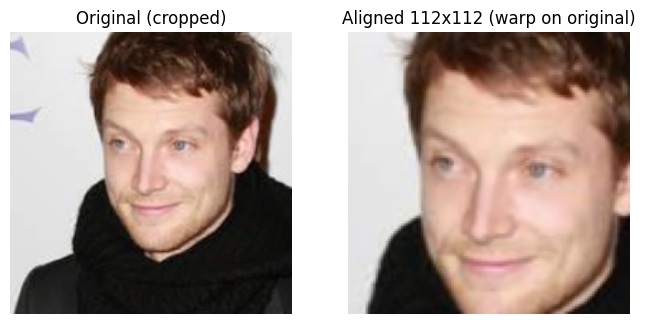

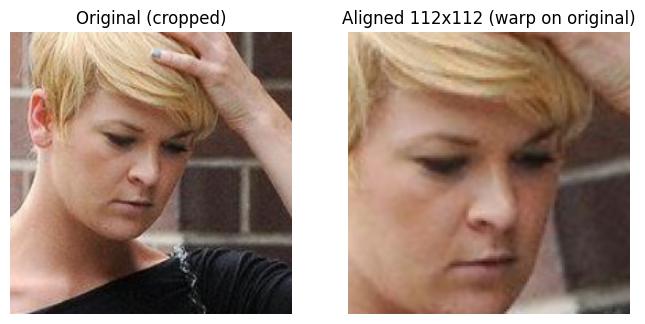

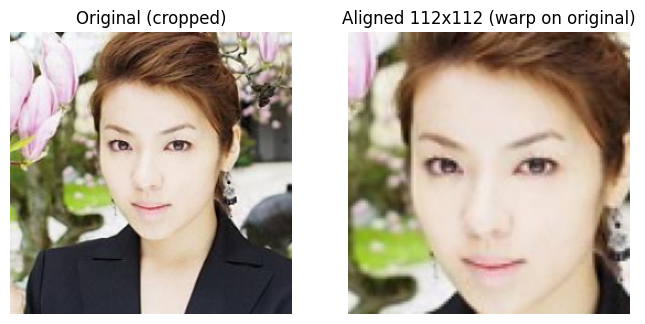

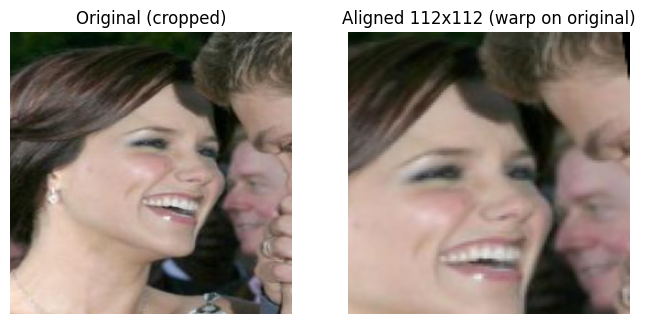

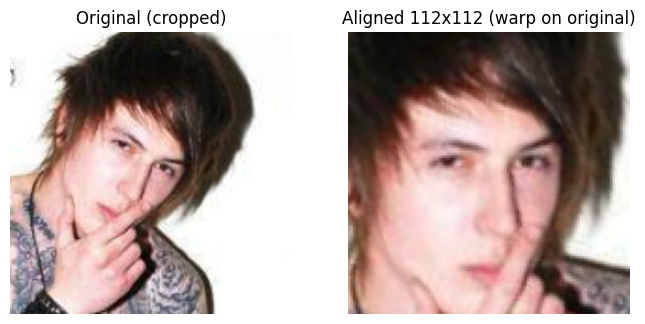

In [ ]:
for i in range(5):
  img_path = val_align.iloc[i]["path"]
  aligned_bgr, pts5_orig, M = align_cropped_face_pipeline(
    img_path, model, device, model_in_hw=cfg.out_size, out_aligned_size=112
  )

  plt.figure(figsize=(8,4))
  plt.subplot(1,2,1)
  plt.imshow(np.asarray(Image.open(img_path).convert("RGB")))
  plt.title("Original (cropped)")
  plt.axis("off")

  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(aligned_bgr, cv2.COLOR_BGR2RGB))
  plt.title("Aligned 112x112 (warp on original)")
  plt.axis("off")
  plt.show()



Этап выравнивания лиц обеспечивает корректную геометрическую нормализацию: глаза, нос и рот приводятся к каноническим позициям в пространстве 112×112. Визуальная проверка показывает устойчивость к наклонам головы и различным позам, что соответствует требованиям современных систем распознавания лиц. Полученное качество alignment считается достаточным для дальнейшего этапа face recognition.

Сохраним aligned-изображения

In [ ]:
ALIGNED_ROOT = Path("/content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1/aligned_112")

OUT_DIR_TRAIN = ALIGNED_ROOT / "train"
OUT_DIR_VAL   = ALIGNED_ROOT / "val"
OUT_DIR_TEST  = ALIGNED_ROOT / "test"

OUT_DIR_TRAIN.mkdir(parents=True, exist_ok=True)
OUT_DIR_VAL.mkdir(parents=True, exist_ok=True)
OUT_DIR_TEST.mkdir(parents=True, exist_ok=True)

print("Aligned root:", ALIGNED_ROOT)


Aligned root: /content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1/aligned_112


In [ ]:

def save_aligned_split(df: pd.DataFrame, out_dir: Path, overwrite: bool = False) -> pd.DataFrame:
    df = df.copy()
    aligned_paths = []
    ok = 0
    fail = 0

    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Align -> {out_dir.name}"):
        img_path = str(row["path"])
        img_id = row["image_id"] if "image_id" in row else Path(img_path).name

        out_path = out_dir / img_id
        aligned_paths.append(str(out_path))

        if out_path.exists() and not overwrite:
            ok += 1
            continue

        try:
            aligned_bgr, pts5_orig, M = align_cropped_face_pipeline(
                img_path=img_path,
                model=model,
                device=device,
                model_in_hw=cfg.out_size,       # (H,W) = (128,128)
                out_aligned_size=112,
                use_softargmax=True,
                soft_beta=100.0,
            )
            # write jpg
            cv2.imwrite(str(out_path), aligned_bgr)
            ok += 1
        except Exception as e:
            # если нужно — можно логировать e
            fail += 1

    df["aligned_path"] = aligned_paths
    print(f"{out_dir.name}: saved/exists={ok}, failed={fail}")
    return df


In [ ]:
train_align_112 = save_aligned_split(train_align, OUT_DIR_TRAIN, overwrite=False)
val_align_112   = save_aligned_split(val_align, OUT_DIR_VAL, overwrite=False)
test_align_112  = save_aligned_split(test_align, OUT_DIR_TEST, overwrite=False)


Align -> train: 100%|██████████| 10070/10070 [04:17<00:00, 39.10it/s]


train: saved/exists=10070, failed=0


Align -> val: 100%|██████████| 2518/2518 [01:04<00:00, 39.22it/s]


val: saved/exists=2518, failed=0


Align -> test: 100%|██████████| 1399/1399 [18:59<00:00,  1.23it/s]

test: saved/exists=1399, failed=0


In [ ]:
# файлы есть?
def check_missing(df):
    missing = df[~df["aligned_path"].apply(os.path.exists)]
    print("Missing:", len(missing))
    return missing

_ = check_missing(train_align_112)
_ = check_missing(val_align_112)
_ = check_missing(test_align_112)


Missing: 0
Missing: 0
Missing: 0


In [ ]:
CSV_OUT = Path("/content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1")

train_align_112.to_csv(CSV_OUT / "train_align_112.csv", index=False)
val_align_112.to_csv(CSV_OUT / "val_align_112.csv", index=False)
test_align_112.to_csv(CSV_OUT / "test_align_112.csv", index=False)

print("Saved CSVs to:", CSV_OUT)


Saved CSVs to: /content/drive/MyDrive/Colab Notebooks/MFTI/arcface_mainset_1


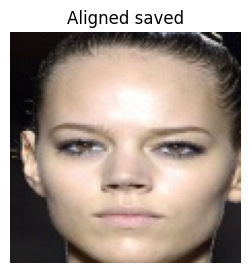

In [ ]:
# визиализируем
p0 = train_align_112.iloc[0]["aligned_path"]
img = cv2.imread(p0)
plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Aligned saved")
plt.axis("off")
plt.show()


Этап выравнивания лица завершен. Выровненный набор данных (112×112) сохраняется и используется на следующем этапе (распознавание лиц).